INICIO

In [123]:
#!pip install PyPortfolioOpt
#!pip install yfinance

In [140]:
import yfinance as yf
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting
import matplotlib.pyplot as plt
import numpy as np

In [141]:
acciones_usa = [
    "AAPL",   # Apple Inc.
    "AMZN",   # Amazon.com Inc.
    "AXP",    # American Express Company
    "BA",     # Boeing Company
    "BRK-B",  # Berkshire Hathaway Inc. (Clase B)
    "C",      # Citigroup Inc.
    "CMCSA",  # Comcast Corporation
    "CSCO",   # Cisco Systems Inc.
    "DIS",    # Walt Disney Company
    "GOOG",   # Alphabet Inc. (Clase C)
    "HD",     # Home Depot Inc.
    "JNJ",    # Johnson & Johnson
    "JPM",    # JPMorgan Chase & Co.
    "KO",     # Coca-Cola Company
    "META",   # Meta Platforms Inc.
    "MSFT",   # Microsoft Corporation
    "TSLA",   # Tesla Inc.
]
acciones_usa

['AAPL',
 'AMZN',
 'AXP',
 'BA',
 'BRK-B',
 'C',
 'CMCSA',
 'CSCO',
 'DIS',
 'GOOG',
 'HD',
 'JNJ',
 'JPM',
 'KO',
 'META',
 'MSFT',
 'TSLA']

DATOS HISTORICOS

In [142]:
datos = yf.download(acciones_usa, start='2018-01-01', end='2024-01-01', interval='1mo')
#print(datos.head())  # Muestra las primeras filas
#print(datos.columns)
datos = datos['Close']
datos


[*********************100%***********************]  17 of 17 completed


Ticker,AAPL,AMZN,AXP,BA,BRK-B,C,CMCSA,CSCO,DIS,GOOG,HD,JNJ,JPM,KO,META,MSFT,TSLA
Date,,,,,,,,,,,,,,,,,
2018-01-01,39.388081,72.544502,89.930275,337.712097,214.380005,61.691036,35.728176,33.322872,104.392479,58.287567,169.542160,113.904396,94.412521,38.184742,186.178802,88.027710,23.620667
2018-02-01,41.902924,75.622498,88.531578,345.183502,207.199997,59.340664,30.539404,36.189899,99.099380,55.038738,153.820053,107.054794,94.764877,34.678383,177.641434,86.878815,22.870667
2018-03-01,39.631340,72.366997,84.691086,314.009705,199.479996,53.275208,28.818880,34.662445,96.486435,51.404797,150.419113,106.305199,90.227661,34.846886,159.181931,84.959770,17.742001
2018-04-01,39.036098,78.306503,89.657402,319.449432,193.729996,53.882927,26.474237,35.793880,96.380783,50.684387,156.844559,104.928177,89.251266,34.976418,171.345490,87.054214,19.593332
2018-05-01,44.140598,81.481003,89.583916,337.262604,191.529999,52.635902,26.447027,34.794460,95.554626,54.055279,158.329819,99.229240,88.244278,34.806427,191.050217,92.006393,18.982000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,186.456345,138.009995,155.117111,224.029999,360.200012,38.847012,44.723652,54.770596,82.658859,136.858261,318.220642,154.352707,141.141449,57.144848,294.764038,323.982361,258.079987
2023-09-01,170.151169,127.120003,146.477127,191.679993,350.299988,39.145447,42.409039,51.342064,80.060959,131.377945,292.968719,149.771057,139.877899,53.467628,299.067596,312.771545,250.220001
2023-10-01,169.713882,133.089996,143.374573,186.820007,341.329987,37.584583,39.491867,49.785374,80.594360,124.851395,276.030151,142.645493,134.129227,54.382809,300.123566,334.920624,200.839996


In [143]:
#Miramos cuales tienen datos nulos para tomar medidas
datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2018-01-01 to 2023-12-01
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    72 non-null     float64
 1   AMZN    72 non-null     float64
 2   AXP     72 non-null     float64
 3   BA      72 non-null     float64
 4   BRK-B   72 non-null     float64
 5   C       72 non-null     float64
 6   CMCSA   72 non-null     float64
 7   CSCO    72 non-null     float64
 8   DIS     72 non-null     float64
 9   GOOG    72 non-null     float64
 10  HD      72 non-null     float64
 11  JNJ     72 non-null     float64
 12  JPM     72 non-null     float64
 13  KO      72 non-null     float64
 14  META    72 non-null     float64
 15  MSFT    72 non-null     float64
 16  TSLA    72 non-null     float64
dtypes: float64(17)
memory usage: 10.1 KB


CALCULAR LA RENTABILIDAD ESPERADA 

In [144]:
mu = expected_returns.mean_historical_return(datos, frequency=12)
mu

Ticker
AAPL     0.306515
AMZN     0.133091
AXP      0.129335
BA      -0.042827
BRK-B    0.089843
C       -0.036220
CMCSA    0.028601
CSCO     0.065847
DIS     -0.026254
GOOG     0.160223
HD       0.123830
JNJ      0.049891
JPM      0.099265
KO       0.070636
META     0.113984
MSFT     0.276544
TSLA     0.488443
dtype: float64

CALCULAMOS LA MATRIZ DE COVARIANZA CON DATOS MENSUALES

In [145]:
S = risk_models.sample_cov(datos, frequency=12)
S

Ticker,AAPL,AMZN,AXP,BA,BRK-B,C,CMCSA,CSCO,DIS,GOOG,HD,JNJ,JPM,KO,META,MSFT,TSLA
Ticker,,,,,,,,,,,,,,,,,
AAPL,0.096125,0.068133,0.039157,0.045792,0.031436,0.052243,0.032206,0.034089,0.049983,0.043405,0.035725,0.020277,0.031054,0.015703,0.056192,0.045714,0.136130
AMZN,0.068133,0.107534,0.038919,0.032569,0.026809,0.047928,0.027053,0.032045,0.048168,0.055342,0.036222,0.011118,0.021201,0.003622,0.064339,0.048302,0.125358
AXP,0.039157,0.038919,0.086765,0.088408,0.040576,0.085230,0.045971,0.037272,0.068070,0.035698,0.031326,0.018539,0.057050,0.028497,0.035625,0.027947,0.082128
BA,0.045792,0.032569,0.088408,0.203075,0.043042,0.116453,0.061075,0.051993,0.072656,0.041193,0.043303,0.014521,0.071903,0.033593,0.051047,0.035091,0.066146
BRK-B,0.031436,0.026809,0.040576,0.043042,0.038796,0.045109,0.032305,0.024268,0.037735,0.025850,0.023402,0.020797,0.036604,0.022016,0.024070,0.021864,0.049002
C,0.052243,0.047928,0.085230,0.116453,0.045109,0.140584,0.063332,0.042362,0.081870,0.046177,0.044873,0.026874,0.086061,0.031364,0.065000,0.033546,0.087464
CMCSA,0.032206,0.027053,0.045971,0.061075,0.032305,0.063332,0.068405,0.029962,0.050564,0.036132,0.028859,0.020753,0.048910,0.025018,0.049087,0.022426,0.043972
CSCO,0.034089,0.032045,0.037272,0.051993,0.024268,0.042362,0.029962,0.069745,0.031205,0.026898,0.024838,0.016928,0.030639,0.013019,0.027839,0.022887,0.029794
DIS,0.049983,0.048168,0.068070,0.072656,0.037735,0.081870,0.050564,0.031205,0.107806,0.041580,0.027571,0.019005,0.059593,0.029546,0.037228,0.031810,0.081715


OPTIMIZACION DEL PORTFOLIO

Buscar el rendimiento del bono a largo plazo de USA (30Yr).
También se puede ver el bono a largo tiempo del país en el que tenemos las acciones.
Buscar en google por: Daily Treasury Par Yield Curve Rates
El último disponible al 01/31/2024 es de 4.22

In [146]:
#Tasa libre de riesgo sacada de los datos actuales de la web en 100%
tasa_libre_riesgo = 0.0422

In [147]:
#Nueva instancia de EfficienFrontier para la optimización
ef = EfficientFrontier(mu, S)

In [148]:
#Cálculo del portfolio óptimo para el máximo ratio de Shaape
pesos_optimizados = ef.max_sharpe(risk_free_rate = tasa_libre_riesgo)
pesos_optimizados

OrderedDict([('AAPL', 0.0950069917269156),
             ('AMZN', 0.0),
             ('AXP', 0.0),
             ('BA', 0.0),
             ('BRK-B', 0.0),
             ('C', 0.0),
             ('CMCSA', 0.0),
             ('CSCO', 0.0),
             ('DIS', 0.0),
             ('GOOG', 0.0),
             ('HD', 0.0),
             ('JNJ', 0.0),
             ('JPM', 0.0),
             ('KO', 0.0),
             ('META', 0.0),
             ('MSFT', 0.8900108638288783),
             ('TSLA', 0.014982144444206)])

In [149]:
#Observamos el desempeño del portfolio: rendimiento, volatilidad y razón de Sharpe
rendimiento, volatilidad, razon_sharpe = ef.portfolio_performance(verbose=True)

Expected annual return: 28.3%
Annual volatility: 21.7%
Sharpe Ratio: 1.11


c:\Users\DEEPGAMING\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


Expected annual return: 28.3%
Annual volatility: 21.7%
Sharpe Ratio: 1.11

In [150]:
rendimiento

0.28256650727297256

In [151]:

volatilidad

0.2171615754454045

In [152]:

razon_sharpe

1.1068556063842054

FRONTERA EFICIENTE

In [153]:
#Nueva instancia de EfficienFrontier para la optimización para graficar la frontera
ef = EfficientFrontier(mu, S)

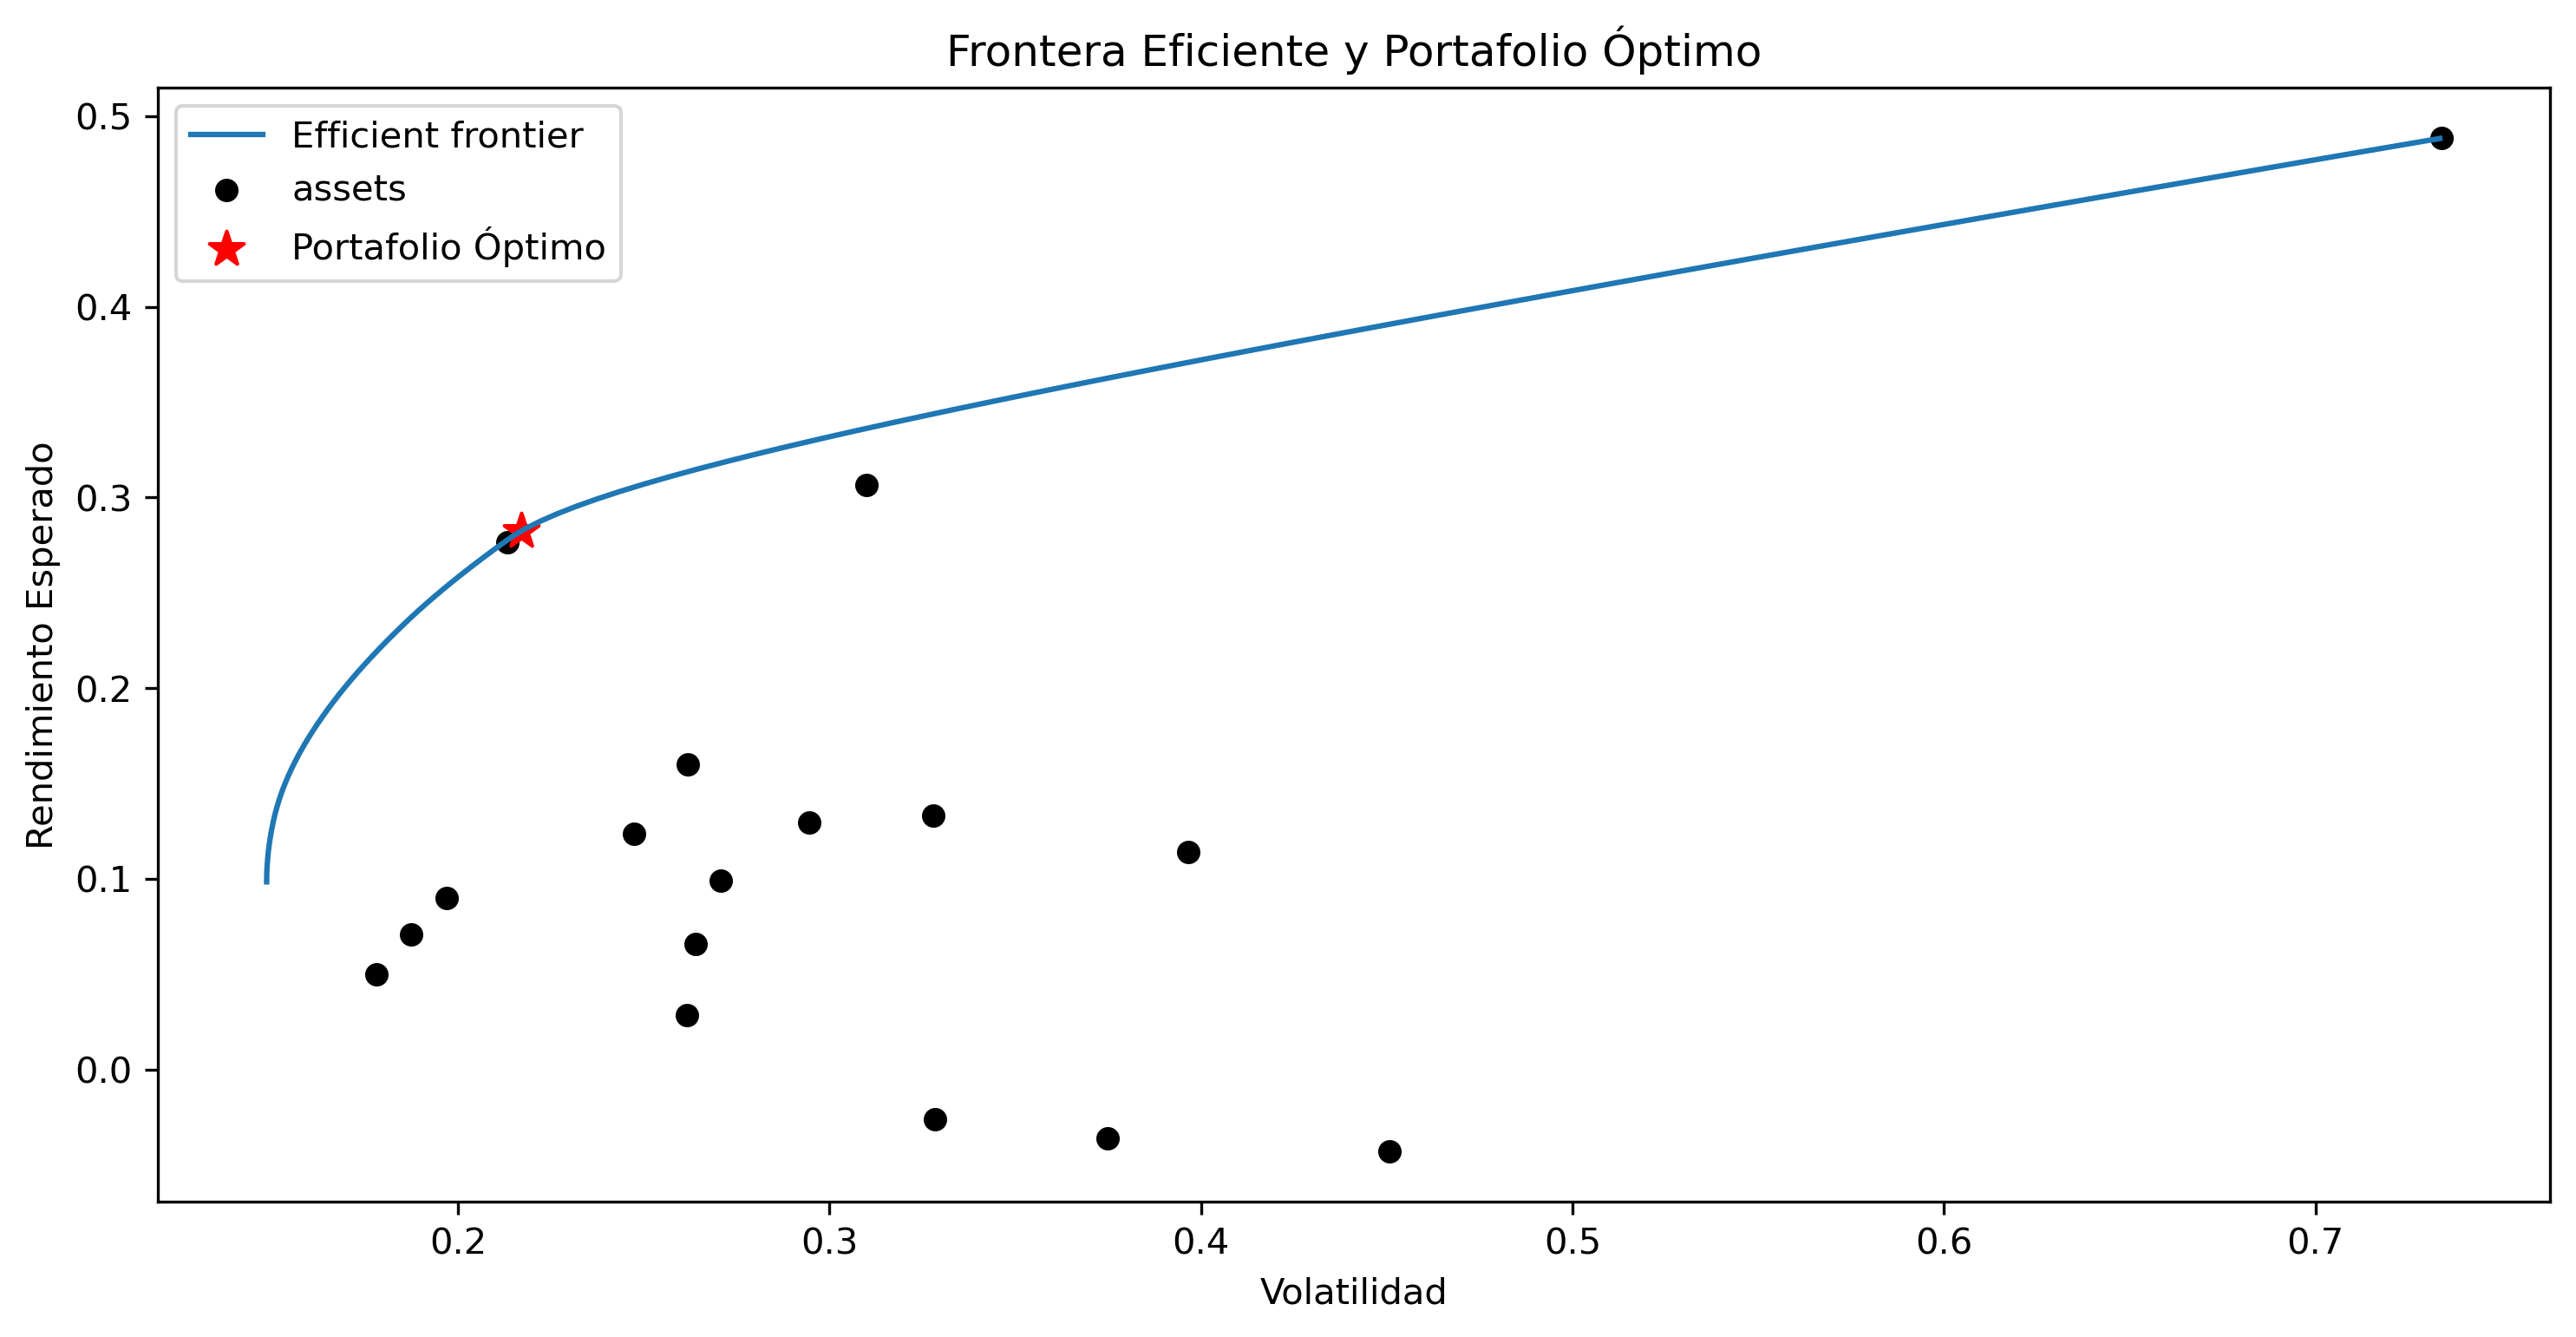

In [154]:
fig, ejes = plt.subplots(figsize=(10,5), dpi = 300)
plotting.plot_efficient_frontier(ef, ax=ejes, show_assets=True)
ejes.scatter(volatilidad, rendimiento, marker='*', color = 'red', s = 100, label = 'Portafolio Óptimo')
ejes.set_title('Frontera Eficiente y Portafolio Óptimo')
ejes.set_xlabel('Volatilidad')
ejes.set_ylabel('Rendimiento Esperado')
ejes.legend()
plt.show()

In [156]:
ef = EfficientFrontier(mu, S)

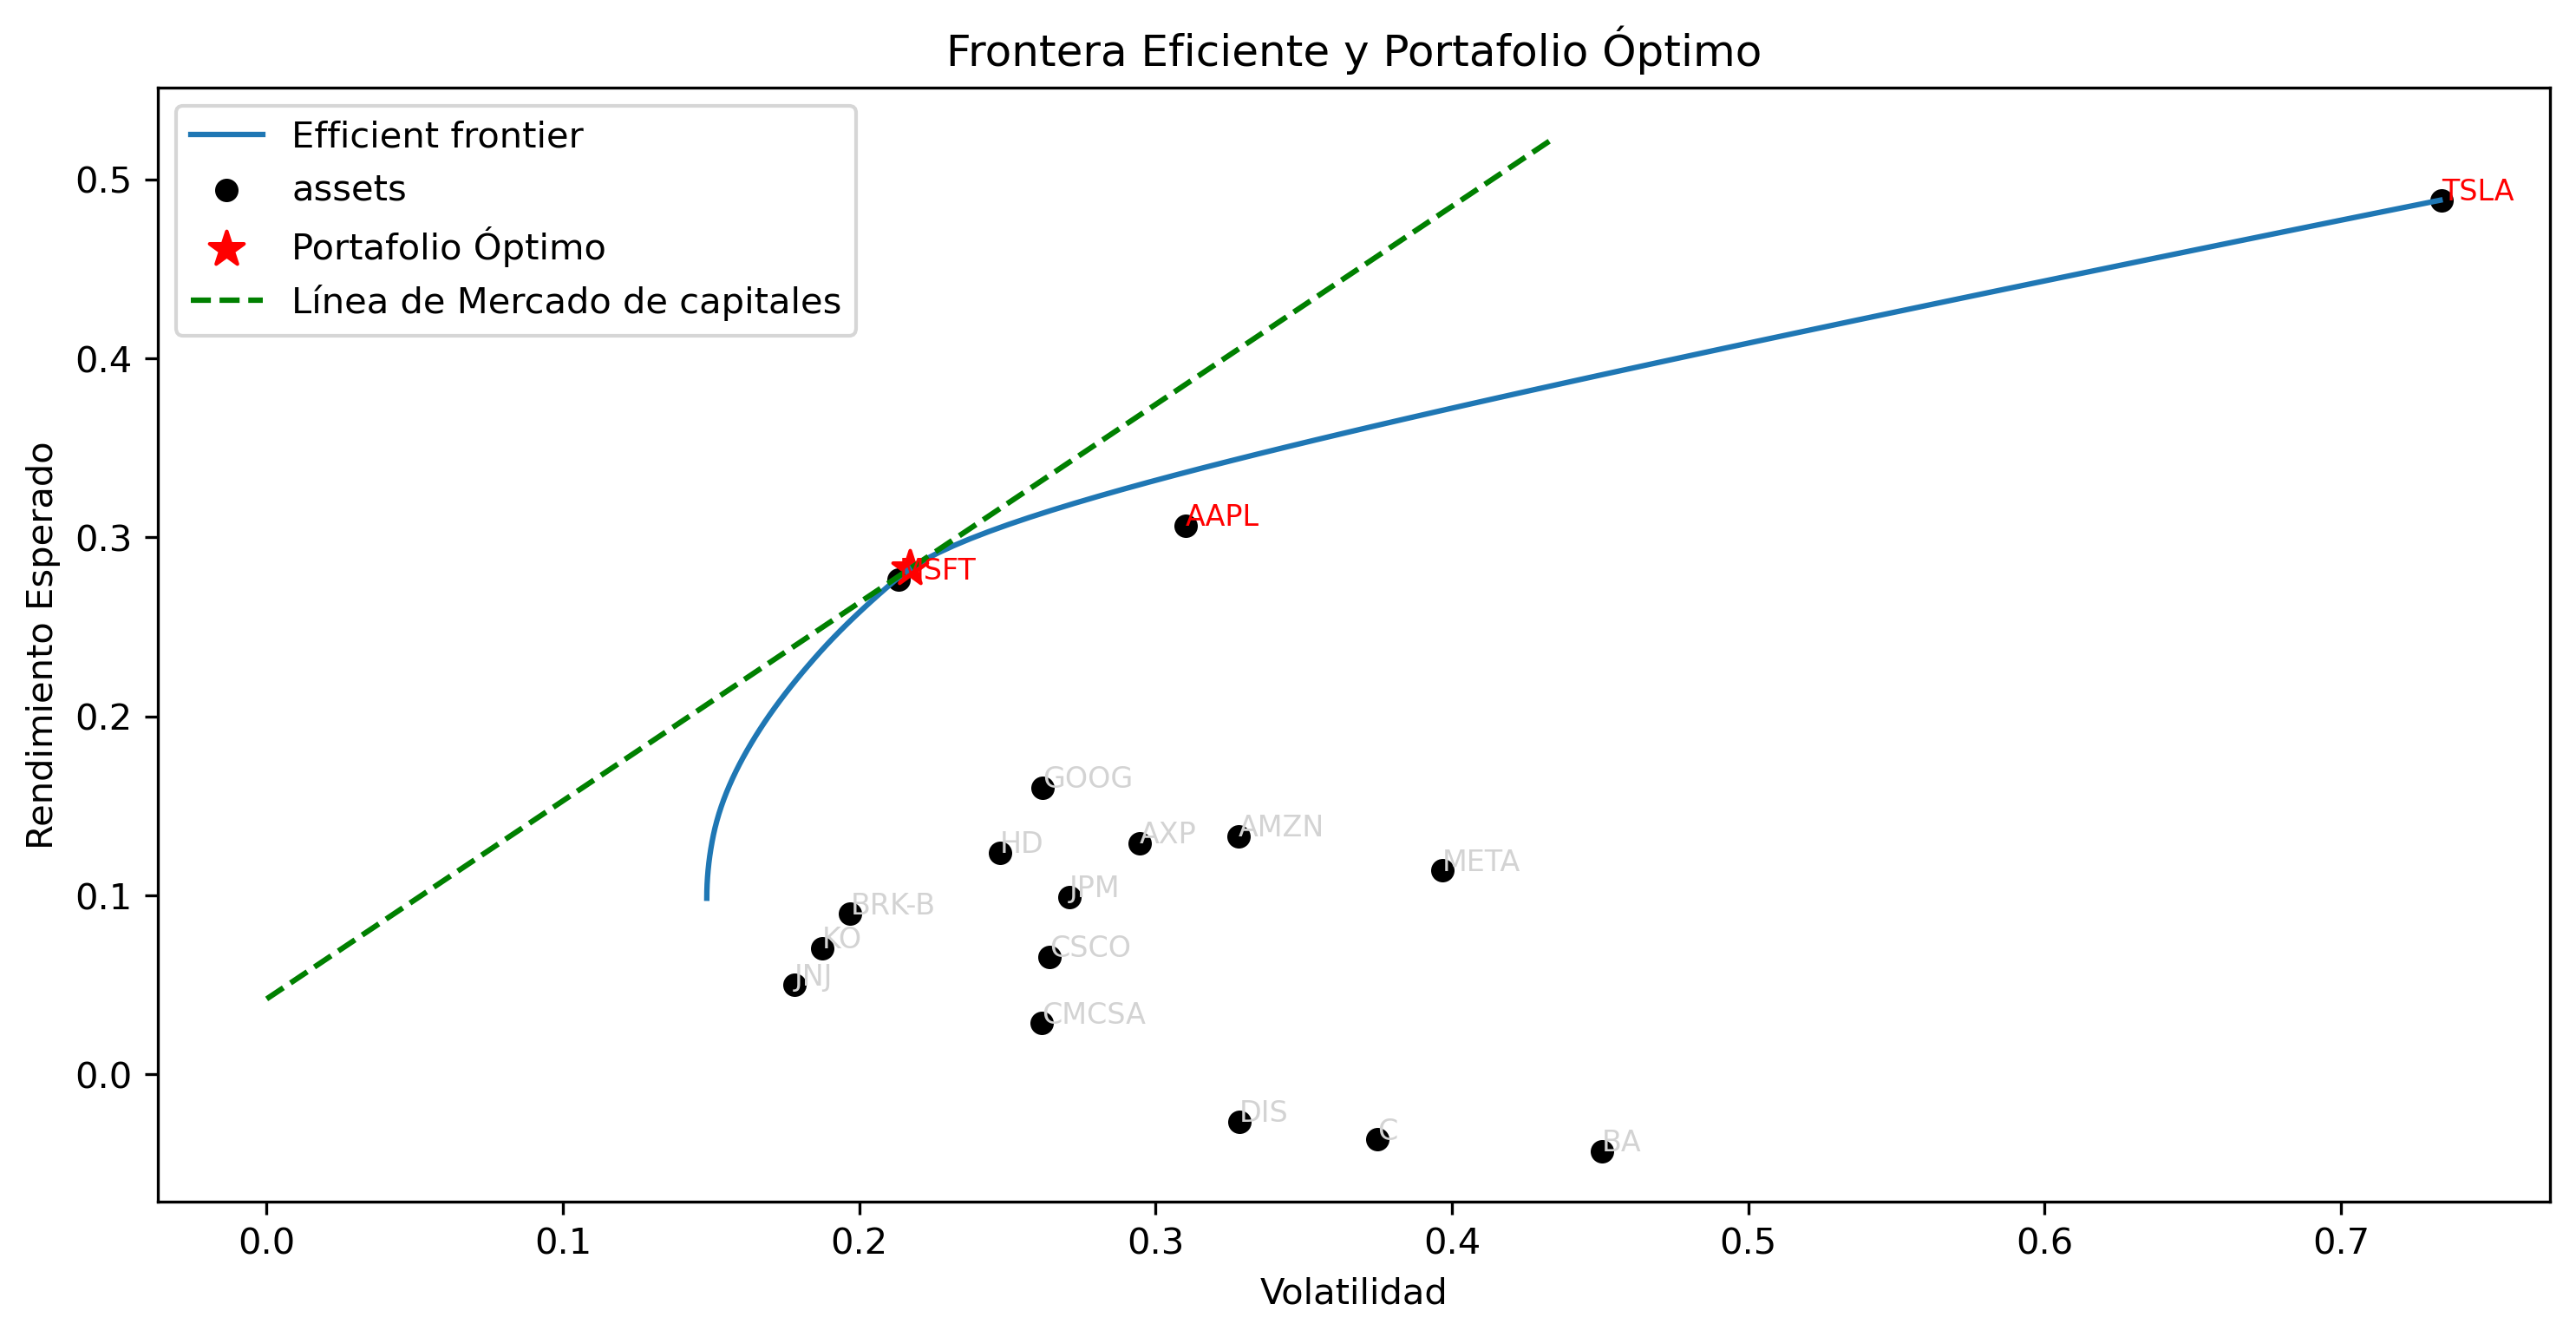

In [157]:
#Función para calcular la CML
def capital_market_line(tasa_libre_riesgo):
    slope = (rendimiento - tasa_libre_riesgo) / (volatilidad - 0) #Pendiente de la CML
    return lambda x: tasa_libre_riesgo + slope * x

#Graficar la frontera eficiente
fig, ejes = plt.subplots(figsize=(10,5), dpi = 300)
plotting.plot_efficient_frontier(ef, ax=ejes, show_assets=True)

#Marcar el portafolio óptimo
ejes.scatter(volatilidad, rendimiento, marker='*', color = 'red', s = 100, label = 'Portafolio Óptimo')

for activo, peso in pesos_optimizados.items():
    #Calcular la volatilidad y el retorno esperado del activo
    volatilidad_activo = S.loc[activo, activo] ** 0.5
    retorno_esperado_activo = mu[activo]

    #Marca el activo en el grafico
    ejes.annotate(activo,
                  (volatilidad_activo, retorno_esperado_activo),
                  color='red' if peso > 0 else 'lightgray',
                  fontsize=8) # Cambio de color a gris y reducción del tamaño de fuente
    
#Grafico la CML
cml = capital_market_line(tasa_libre_riesgo)
x = np.linspace(0, volatilidad * 2, 100) #Ajuste en el rango de x para evitar errores
ejes.plot(x, cml(x), color='green', linestyle='--', label='Línea de Mercado de capitales')

#Detalle del gráfico
ejes.set_title('Frontera Eficiente y Portafolio Óptimo')
ejes.set_xlabel('Volatilidad')
ejes.set_ylabel('Rendimiento Esperado')
ejes.legend()
plt.show()